### HOUSE PREDICTION MODEL

Installing Libraries

In [1]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\karri\appdata\roaming\python\python313\site-packages (2.2.3)




[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Importing Pandas Library and reading the csv file

In [2]:
import pandas as pd

df = pd.read_csv("train.csv")

Studying basic info of the csv file

In [3]:
print(df.shape)
print(df.head())
print(df.info())

(1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008  

Checkinf for missing value (null) count of each feature

In [4]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


Summary of statistics

In [5]:
print(df.describe())   # numerical summary
print(df['SalePrice'].describe())   # target variable

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

Importing visulaization libraries

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

Plotting Graphs

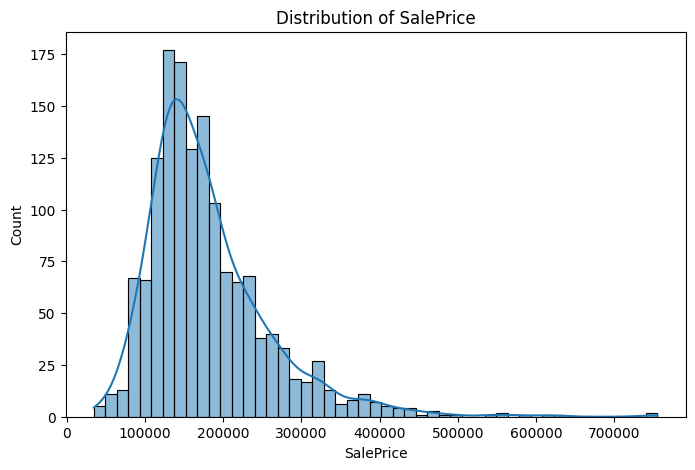

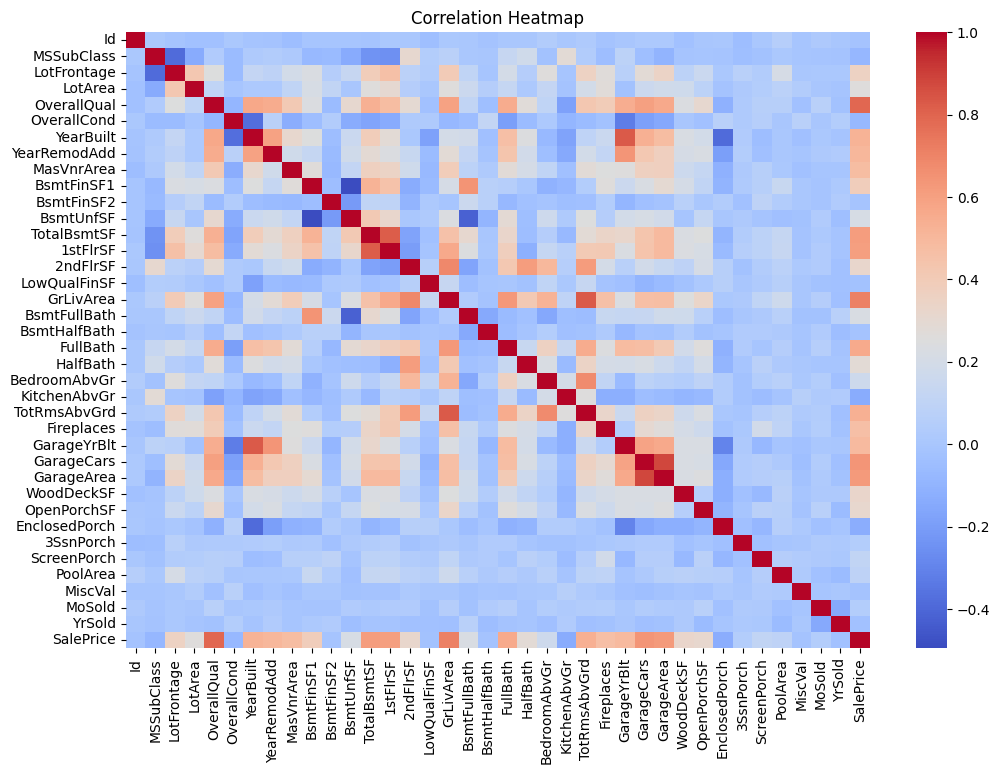

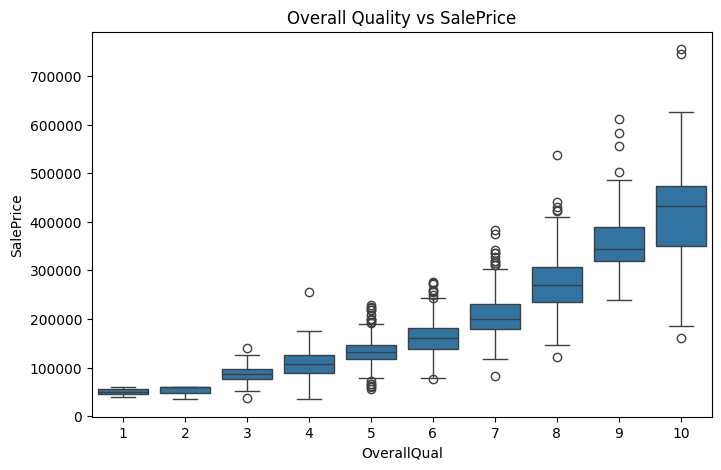

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['SalePrice'], kde=True)
plt.title("Distribution of SalePrice")
plt.show()

# Correlation heatmap (numerical features only)
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include='number').corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Example: Relationship between Overall Quality and SalePrice
plt.figure(figsize=(8,5))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title("Overall Quality vs SalePrice")
plt.show()

Filling Missing Values

In [8]:
# Separate features and target
y = df["SalePrice"]           # <-- keep raw values
X = df.drop("SalePrice", axis=1)

# Separate numerical and categorical features
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Fill missing values
for col in num_features:
    X[col] = X[col].fillna(X[col].median())
for col in cat_features:
    X[col] = X[col].fillna(X[col].mode()[0])

# One-hot encode categoricals
X = pd.get_dummies(X, columns=cat_features, drop_first=True)

# Feature scaling (only X, not y)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[num_features] = scaler.fit_transform(X[num_features])
print(y.head())
print(y.describe())



0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


Encoding Categorical Features

In [9]:
# One-hot encoding for categorical columns
df = pd.get_dummies(df, columns=cat_features, drop_first=True)
print(df.shape)   # Notice column expansion


(1460, 246)


Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])


Feature and Target Selections

In [11]:
print(X.shape, y.shape)


(1460, 245) (1460,)


Train, Test and Split

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_val)

# Evaluate with RMSE
rmse_lr = np.sqrt(mean_squared_error(y_val, y_pred_lr))


Decision Tree Regressor

In [14]:
from sklearn.tree import DecisionTreeRegressor

# Train model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_val)

# Evaluate
rmse_dt = np.sqrt(mean_squared_error(y_val, y_pred_dt))


Comparing RMSE Values of Linear Regression and Decision Tree

In [15]:
print("Linear Regression RMSE:", rmse_lr)
print("Decision Tree RMSE:", rmse_dt)


Linear Regression RMSE: 51405.094253343515
Decision Tree RMSE: 39627.552500693324


### Ensemble Models

Random Forest Regressor

In [16]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_val)
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
print("Random Forest RMSE:", rmse_rf)


Random Forest RMSE: 28379.356222633407


XGBoost Regressor

In [17]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=4, random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_val)
rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred_xgb))
print("XGBoost RMSE:", rmse_xgb)

XGBoost RMSE: 25990.86485671456


Comparison of All Models

In [19]:
print("Linear Regression RMSE:", rmse_lr)
print("Decision Tree RMSE:", rmse_dt)
print("Random Forest RMSE:", rmse_rf)
print("XGBoost RMSE:", rmse_xgb)

Linear Regression RMSE: 51405.094253343515
Decision Tree RMSE: 39627.552500693324
Random Forest RMSE: 28379.356222633407
XGBoost RMSE: 25990.86485671456


Feature Importance

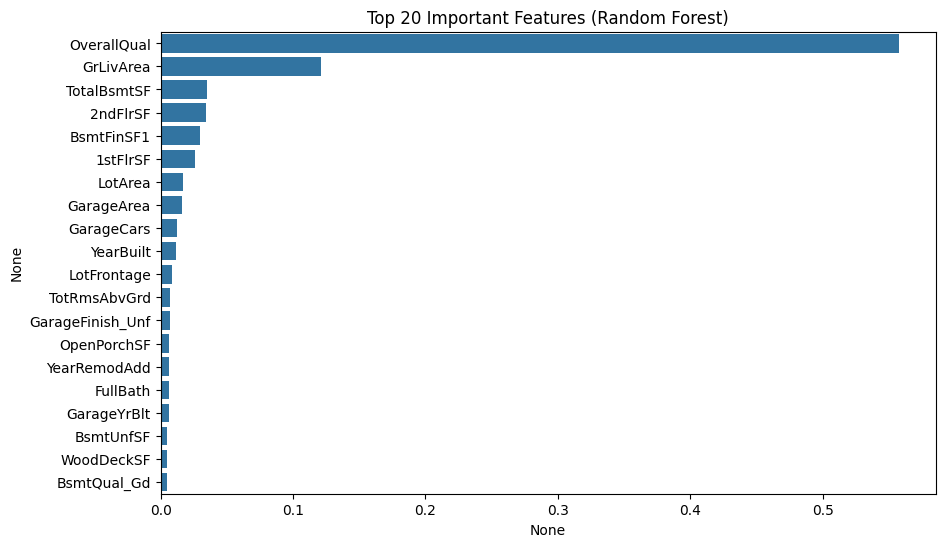

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest feature importance
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = feat_importances.nlargest(20)

plt.figure(figsize=(10,6))
sns.barplot(x=top_features, y=top_features.index)
plt.title("Top 20 Important Features (Random Forest)")
plt.show()


### Cross Validation And Hyperparameter Tuning

CV For Random Forest

In [21]:
from sklearn.model_selection import cross_val_score
import numpy as np

rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Negative MSE → convert to RMSE
scores = cross_val_score(rf, X, y, cv=5, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores)

print("Cross-validation RMSE scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("Std Dev:", rmse_scores.std())


Cross-validation RMSE scores: [26709.81871088 32072.90666322 31547.91952093 24270.34048114
 35697.67627742]
Mean RMSE: 30059.73233071986
Std Dev: 4069.2250662915835


Hyperparameter Tuning For RandomForest

In [22]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)

search = RandomizedSearchCV(
    rf,
    param_distributions=param_grid,
    n_iter=10,  # number of random configs
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    random_state=42
)

search.fit(X, y)

print("Best parameters:", search.best_params_)
print("Best RMSE:", np.sqrt(-search.best_score_))

Best parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Best RMSE: 30405.266857687777


Hyperparameter Tuning For XGB

In [23]:
param_grid_xgb = {
    'n_estimators': [300, 500, 800],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0]
}

xgb = XGBRegressor(random_state=42)

search_xgb = RandomizedSearchCV(
    xgb,
    param_distributions=param_grid_xgb,
    n_iter=10,
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    random_state=42
)

search_xgb.fit(X, y)

print("Best parameters (XGB):", search_xgb.best_params_)
print("Best RMSE (XGB):", np.sqrt(-search_xgb.best_score_))


Best parameters (XGB): {'subsample': 0.7, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.05}
Best RMSE (XGB): 27457.645055612473


Model Leaderboard

In [24]:
import pandas as pd

results = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "XGBoost"],
    "RMSE": [rmse_lr, rmse_dt, rmse_rf, rmse_xgb]
}

df_results = pd.DataFrame(results).sort_values(by="RMSE")
print(df_results)


               Model          RMSE
3            XGBoost  25990.864857
2      Random Forest  28379.356223
1      Decision Tree  39627.552501
0  Linear Regression  51405.094253


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=4, random_state=42)
}


In [26]:
results = {}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
    rmse_scores = np.sqrt(-scores)
    results[name] = rmse_scores.mean()

# Sort results
results = dict(sorted(results.items(), key=lambda x: x[1]))
print("Model Leaderboard (lower RMSE is better):")
for name, score in results.items():
    print(f"{name}: {score:.2f}")


Model Leaderboard (lower RMSE is better):
XGBoost: 27768.20
Random Forest: 30102.54
Decision Tree: 40799.27
Linear Regression: 42922.51


In [27]:
best_model_name = list(results.keys())[0]
best_model = models[best_model_name]

# Train best model on full dataset
best_model.fit(X, y)

print(f"✅ Best model selected: {best_model_name}")


✅ Best model selected: XGBoost


In [28]:
import joblib

joblib.dump(best_model, "best_model.pkl")
print("Model saved as best_model.pkl")


Model saved as best_model.pkl


In [29]:
# Example of loading and using the model later
loaded_model = joblib.load("best_model.pkl")

sample = X.iloc[[0]]  # take first row
print("Prediction:", best_model.predict(sample))


Prediction: [203835.67]
